# Trying Price and Total Market Output vs. Number of Firms in Cournot

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# parameters
alpha_d = 100
beta_d = 0.5
# marginal cost for Firm 1
b1 = 0.5  
# marginal cost for Firm 2
b2 = 0.1  


In [3]:
n_values = np.arange(1, 21)
q_per_firm = (alpha_d - beta_d*c) / (n_values + 1)
Q_total = n_values * q_per_firm
price = (alpha_d - Q_total) / beta_d


# Ai Generated
fig, ax1 = plt.subplots(figsize=(8,6))

color1 = 'tab:blue'
ax1.set_xlabel("Number of Firms, n")
ax1.set_ylabel("Total Output, Q", color=color1)
ax1.plot(n_values, Q_total, marker='o', color=color1, lw=2, label="Total Output, Q")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(n_values)

ax2 = ax1.twinx()  # second axis for price
color2 = 'tab:red'
ax2.set_ylabel("Market Price, p", color=color2)
ax2.plot(n_values, price, marker='s', color=color2, lw=2, label="Market Price, p")
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle("Cournot: Total Output & Price vs. Number of Firms", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# End Ai Generated


NameError: name 'c' is not defined

# Price, Leader & Follower Quantities vs. Number of Followers in Stackelberg

In [ ]:
n_followers_range = np.arange(1, 21)
beta_leader = 0.5
beta_follower = 0.1

q_leader_vals = []
q_follower_vals = []
Q_vals = []
price_vals = []

for n in n_followers_range:
    # Leaders equilibrium output
    q_leader = (alpha_d + n*beta_d*beta_follower - (n+1)*beta_d*beta_leader) / 2.
    # Each followers output
    q_follower = (alpha_d - q_leader - beta_d*beta_follower) / (n+1)
    Q = q_leader + n * q_follower
    p = (alpha_d - Q) / beta_d
    
    q_leader_vals.append(q_leader)
    q_follower_vals.append(q_follower)
    Q_vals.append(Q)
    price_vals.append(p)




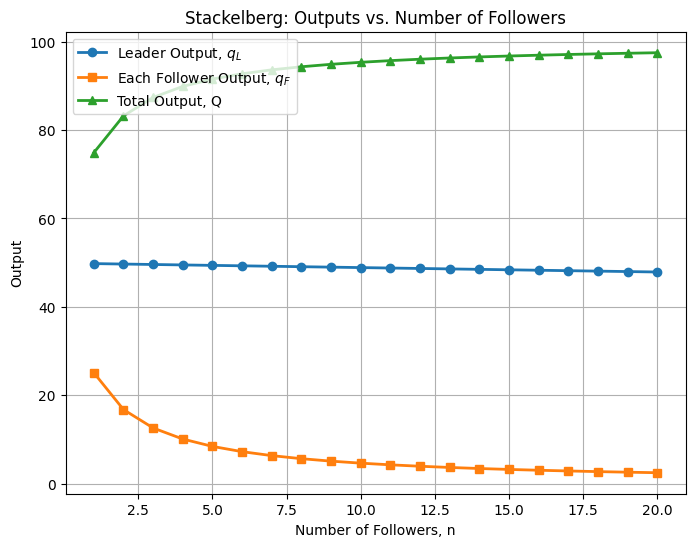

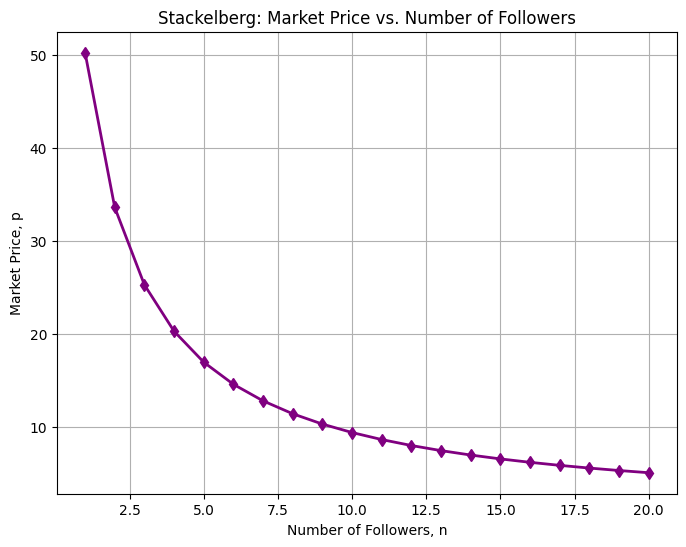

In [4]:

# Ai Generated
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(n_followers_range, q_leader_vals, marker='o', lw=2, label="Leader Output, $q_L$")
ax1.plot(n_followers_range, q_follower_vals, marker='s', lw=2, label="Each Follower Output, $q_F$")
ax1.plot(n_followers_range, Q_vals, marker='^', lw=2, label="Total Output, Q")
ax1.set_xlabel("Number of Followers, n")
ax1.set_ylabel("Output")
ax1.set_title("Stackelberg: Outputs vs. Number of Followers")
ax1.legend()
ax1.grid(True)

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(n_followers_range, price_vals, marker='d', color='purple', lw=2)
ax2.set_xlabel("Number of Followers, n")
ax2.set_ylabel("Market Price, p")
ax2.set_title("Stackelberg: Market Price vs. Number of Followers")
ax2.grid(True)
plt.show()
# End Ai Generated


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# Market parameters
# Demand 
A = 100   
# Marginal cost
c = 10    

def compute_profits(x_follower):
    """
    start with leader
    πₗ = (P - c) * qₗ  with P = A - qₗ - x_follower
  
    max
    qₗ* = (A - c - x_follower) / 2  if positive, else 0.
      
    Follower's profit:
    π_F = (P - c) * x_follower
    """
    q_leader = max((A - c - x_follower) / 2, 0)
    price = A - q_leader - x_follower
    profit_leader = (price - c) * q_leader
    profit_follower = (price - c) * x_follower
    return q_leader, price, profit_leader, profit_follower

# Update function is Ai Generated
def update(x):
    q_leader, price, profit_leader, profit_follower = compute_profits(x)
    print(f"Follower production (x): {x}")
    print(f"Leader optimal production: {q_leader:.2f}")
    print(f"Market price: {price:.2f}")
    print(f"Leader profit: {profit_leader:.2f}")
    print(f"Follower profit: {profit_follower:.2f}")
    
    # Plot Leader profit (y-axis) against Follower profit (x-axis)
    plt.figure(figsize=(6,6))
    plt.scatter(profit_follower, profit_leader, color="blue", s=100)
    plt.xlabel("Follower Profit")
    plt.ylabel("Leader Profit")
    plt.title("Leader Profit vs Follower Profit")
    plt.grid(True)
    plt.show()
# End Ai Generated


interact(update, x=widgets.FloatSlider(value=20, min=0, max=80, step=1, description='Follower x'));

interactive(children=(FloatSlider(value=20.0, description='Follower x', max=80.0, step=1.0), Output()), _dom_c…

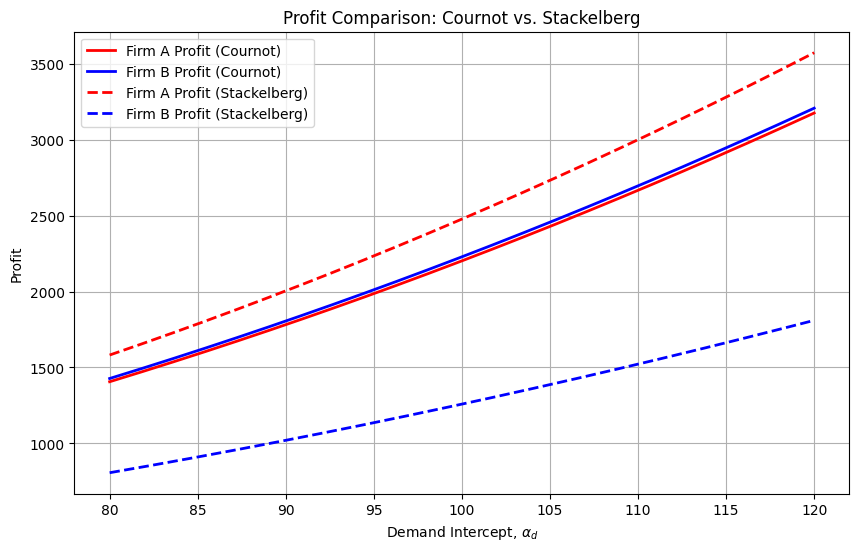

In [ ]:
# %% Graph 4: Profit Comparison (Cournot vs. Stackelberg)
alpha_range = np.linspace(80, 120, 200)
beta_d = 0.5
beta1 = 0.5  # Firm A
beta2 = 0.1  # Firm B

pi1_cournot = []
pi2_cournot = []
pi1_stack = []
pi2_stack = []

for a in alpha_range:
    # Cournot Equilibrium
    q1_C = (a + beta_d*(beta2 - 2*beta1)) / 3.
    
    q2_C = (a + beta_d*(beta1 - 2*beta2)) / 3.
    Q_C = q1_C + q2_C

    p_C = (a - Q_C) / beta_d


    pi1_C = q1_C * p_C - beta1 * q1_C
    pi2_C = q2_C * p_C - beta2 * q2_C
    
    pi1_cournot.append(pi1_C)

    pi2_cournot.append(pi2_C)
    
    # Stackelberg Equilibrium (Firm A leader)
    q1_S = (a + beta_d*beta2 - 2*beta_d*beta1) / 2.
    q2_S = (a - q1_S - beta_d*beta2) / 2.

    Q_S = q1_S + q2_S
    p_S = (a - Q_S) / beta_d

    
    pi1_S = q1_S * p_S - beta1 * q1_S
    pi2_S = q2_S * p_S - beta2 * q2_S
    
    pi1_stack.append(pi1_S)
    pi2_stack.append(pi2_S)

plt.figure(figsize=(10,6))
plt.plot(alpha_range, pi1_cournot, label="Firm A Profit (Cournot)", lw=2, color='red')
plt.plot(alpha_range, pi2_cournot, label="Firm B Profit (Cournot)", lw=2, color='blue')
plt.plot(alpha_range, pi1_stack, label="Firm A Profit (Stackelberg)", lw=2, ls='--', color='red')
plt.plot(alpha_range, pi2_stack, label="Firm B Profit (Stackelberg)", lw=2, ls='--', color='blue')
plt.xlabel(r"Demand Intercept, $\alpha_d$")
plt.ylabel("Profit")
plt.title("Profit Comparison: Cournot vs. Stackelberg")
plt.legend()
plt.grid(True)
plt.show()


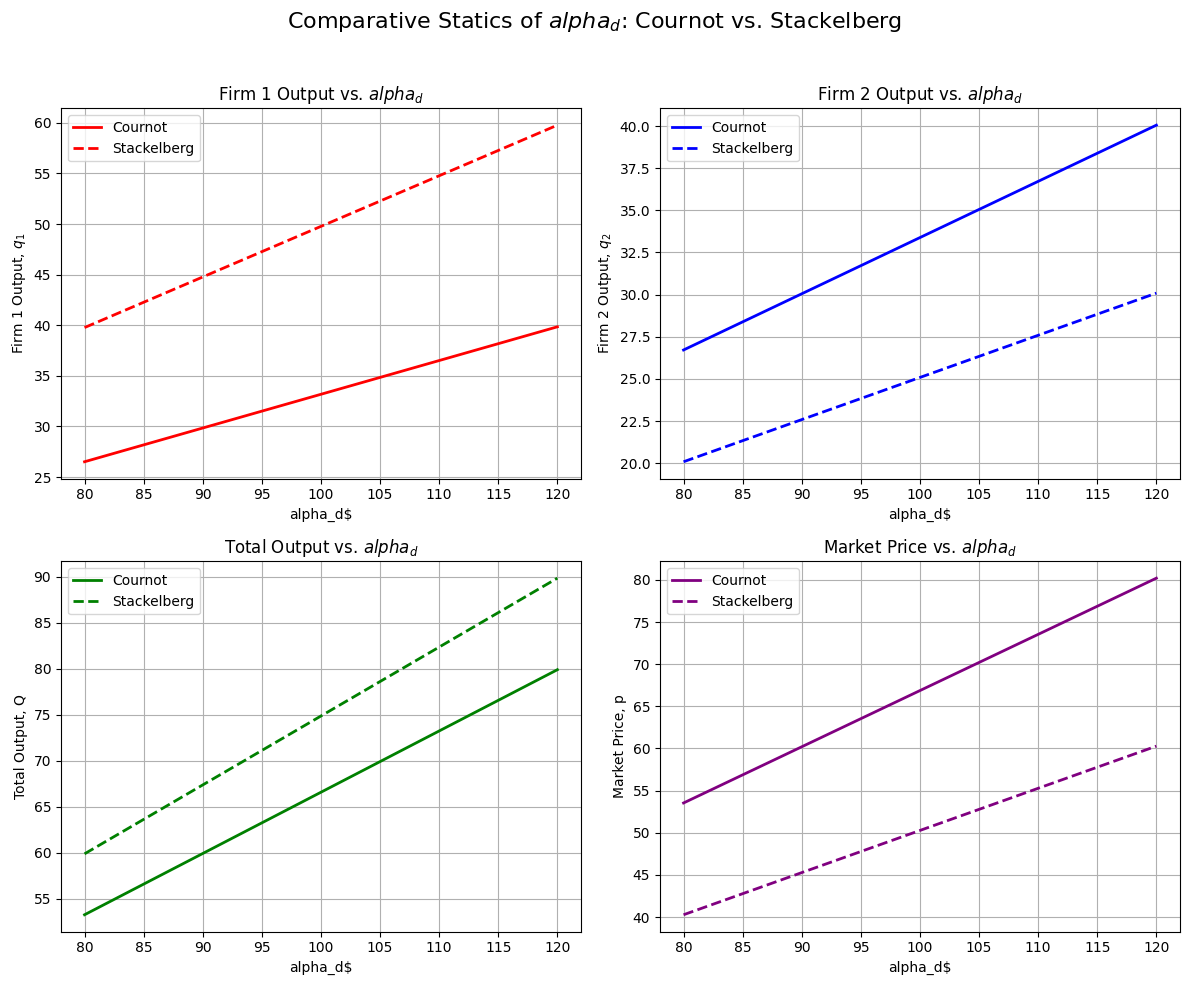

In [ ]:
alpha_vals = np.linspace(80, 120, 200)

q1_cour = []
q2_cour = []
Q_cour = []
p_cour = []

q1_stack = []
q2_stack = []
Q_stack = []
p_stack = []

for a in alpha_vals:
    # Cournot outcomes
    q1_C = (a + beta_d*(beta2 - 2*beta1)) / 3.

    q2_C = (a + beta_d*(beta1 - 2*beta2)) / 3.
    Q_C = q1_C + q2_C
    
    p_C = (a - Q_C) / beta_d
    
    q1_cour.append(q1_C)
    q2_cour.append(q2_C)
    Q_cour.append(Q_C)
    p_cour.append(p_C)




    # Stackelberg outcomes

    q1_S = (a + beta_d*beta2 - 2*beta_d*beta1) / 2.
    q2_S = (a - q1_S - beta_d*beta2) / 2.


    Q_S = q1_S + q2_S
    p_S = (a - Q_S) / beta_d
    
    q1_stack.append(q1_S)
    q2_stack.append(q2_S)
    Q_stack.append(Q_S)
    p_stack.append(p_S)







# All Plots Ai Generated
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Top Left: Firm 1 Output
axs[0, 0].plot(alpha_vals, q1_cour, label="Cournot", lw=2, color='red')
axs[0, 0].plot(alpha_vals, q1_stack, label="Stackelberg", lw=2, ls='--', color='red')
axs[0, 0].set_xlabel(r"alpha_d$")
axs[0, 0].set_ylabel(r"Firm 1 Output, $q_1$")
axs[0, 0].set_title("Firm 1 Output vs. $alpha_d$")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Top Right: Firm 2 Output
axs[0, 1].plot(alpha_vals, q2_cour, label="Cournot", lw=2, color='blue')
axs[0, 1].plot(alpha_vals, q2_stack, label="Stackelberg", lw=2, ls='--', color='blue')
axs[0, 1].set_xlabel(r"alpha_d$")
axs[0, 1].set_ylabel(r"Firm 2 Output, $q_2$")
axs[0, 1].set_title("Firm 2 Output vs. $alpha_d$")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Bottom Left: Total Output Q
axs[1, 0].plot(alpha_vals, Q_cour, label="Cournot", lw=2, color='green')
axs[1, 0].plot(alpha_vals, Q_stack, label="Stackelberg", lw=2, ls='--', color='green')
axs[1, 0].set_xlabel(r"alpha_d$")
axs[1, 0].set_ylabel("Total Output, Q")
axs[1, 0].set_title("Total Output vs. $alpha_d$")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Bottom Right: Market Price
axs[1, 1].plot(alpha_vals, p_cour, label="Cournot", lw=2, color='purple')
axs[1, 1].plot(alpha_vals, p_stack, label="Stackelberg", lw=2, ls='--', color='purple')
axs[1, 1].set_xlabel(r"alpha_d$")
axs[1, 1].set_ylabel("Market Price, p")
axs[1, 1].set_title("Market Price vs. $alpha_d$")
axs[1, 1].legend()
axs[1, 1].grid(True)

fig.suptitle("Comparative Statics of $alpha_d$: Cournot vs. Stackelberg", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# End Ai Generated

